Found 2583 files belonging to 20 classes.
Found 323 files belonging to 20 classes.
Found 329 files belonging to 20 classes.
Found 20 classes: ['Golf', 'bmw serie 1', 'chevrolet spark', 'chevroulet aveo', 'clio', 'duster', 'hyundai i10', 'hyundai tucson', 'logan', 'megane', 'mercedes class a', 'nemo citroen', 'octavia', 'picanto', 'polo', 'sandero', 'seat ibiza', 'symbol', 'toyota corolla', 'volkswagen tiguan']
Epoch 1/25


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


81/81 ━━━━━━━━━━━━━━━━━━━━ 14s 141ms/step - accuracy: 0.0815 - loss: 3.5793 - val_accuracy: 0.0402 - val_loss: 6.1508
Epoch 2/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 134ms/step - accuracy: 0.1375 - loss: 2.9222 - val_accuracy: 0.0402 - val_loss: 10.8159
Epoch 3/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 136ms/step - accuracy: 0.1434 - loss: 2.8368 - val_accuracy: 0.0929 - val_loss: 7.9801
Epoch 4/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 136ms/step - accuracy: 0.1650 - loss: 2.7379 - val_accuracy: 0.0588 - val_loss: 4.2562
Epoch 5/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - accuracy: 0.1876 - loss: 2.6222 - val_accuracy: 0.1053 - val_loss: 3.8032
Epoch 6/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 12s 144ms/step - accuracy: 0.1974 - loss: 2.5307 - val_accuracy: 0.2043 - val_loss: 2.8576
Epoch 7/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 136ms/step - accuracy: 0.2191 - loss: 2.3834 - val_accuracy: 0.2477 - val_loss: 2.5184
Epoch 8/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 137ms/step - accuracy: 0.2603 - loss: 2.2936 - val_accuracy: 0.24

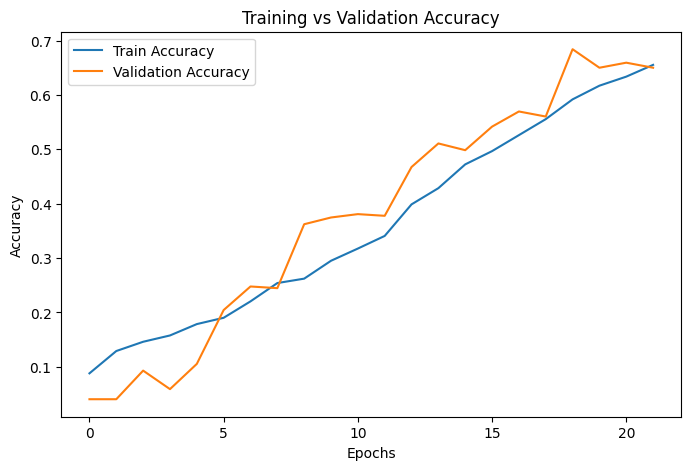

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


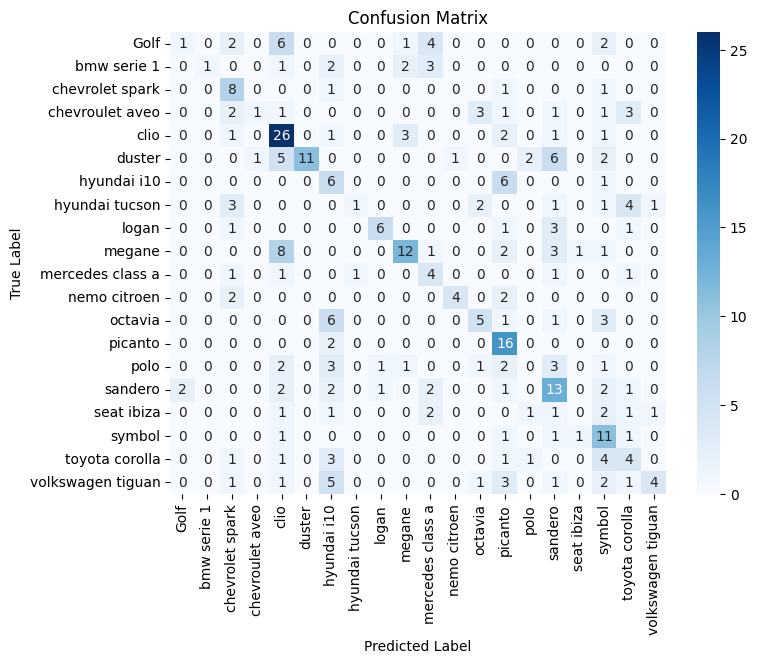

Hamming Distance: 0.5927


In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix

# Paths to dataset directories
train_dir = "../Supervised/dataset/datasetsplitted/train"
val_dir = "../Supervised/dataset/datasetsplitted/val"
test_dir = "../Supervised/dataset/datasetsplitted/test"

# Parameters
IMG_SIZE = (64, 64)  # Image size
BATCH_SIZE = 32

# Load datasets (RAW)
train_dataset_raw = image_dataset_from_directory(train_dir, image_size=IMG_SIZE, batch_size=BATCH_SIZE)
val_dataset_raw = image_dataset_from_directory(val_dir, image_size=IMG_SIZE, batch_size=BATCH_SIZE)
test_dataset_raw = image_dataset_from_directory(test_dir, image_size=IMG_SIZE, batch_size=BATCH_SIZE)

# Extract class names BEFORE applying .map()
class_names = train_dataset_raw.class_names
num_classes = len(class_names)

print(f"Found {num_classes} classes: {class_names}")

# Normalize images
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values to [0,1]
    return image, label

# Apply normalization
train_dataset = train_dataset_raw.map(normalize)
val_dataset = val_dataset_raw.map(normalize)
test_dataset = test_dataset_raw.map(normalize)

# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)

# Train the model with Early Stopping
history = model.fit(train_dataset, validation_data=val_dataset, epochs=25, callbacks=[early_stopping])

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot training history
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

# ---- Confusion Matrix & Hamming Distance ----
y_true, y_pred = [], []

# Get true labels and predictions
for images, labels in test_dataset_raw:  # Use raw dataset to get original labels
    preds = model.predict(images)
    preds = np.argmax(preds, axis=1)  # Convert softmax output to class labels
    y_true.extend(labels.numpy())
    y_pred.extend(preds)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Compute Hamming Distance
hamming_distance = np.mean(y_pred != y_true)
print(f"Hamming Distance: {hamming_distance:.4f}")
